In [1]:
import psycopg2
import config as creds
import sqlalchemy
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [2]:
user=creds.PGUSER
password=creds.PGPASSWORD
host=creds.PGHOST
port=5432
database=creds.PGDATABASE

In [3]:
engine_str=f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(engine_str)
conn = engine.raw_connection()
print('Connected')
cur = conn.cursor()
print('Cursor created')

Connected
Cursor created


In [4]:
query4='''
SELECT b.kbtu,b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b.elegas,b.reportingyear, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b.elegas = 'N'
AND b.reportingyear = 2018; 
'''

In [5]:
query5='''
SELECT b.kbtu,b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b.elegas,b.reportingyear, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b.elegas = 'N'
AND b.reportingyear = 2019; 
'''

In [6]:
query6='''
SELECT b.kbtu,b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b.elegas,b.reportingyear, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b.elegas = 'E'
AND b.reportingyear = 2018; 
'''

In [7]:
query7='''
SELECT b.kbtu,b.reportedbuildinggrossfloorarea, b.ward, b.primarypropertytype_selfselect, b.elegas, b.reportingyear, n.awnd,
       n.cldd, n.htdd, n.tavg, n.wdf2, n.wdf5, n.wsf2,n.wsf5, n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.KBTU > 0
AND b.elegas = 'E'
AND b.reportingyear = 2019; 
'''

In [8]:
natdf2018=pd.read_sql(query4, conn)
natdf2019=pd.read_sql(query5, conn)
eledf2018=pd.read_sql(query6, conn)
eledf2019=pd.read_sql(query7, conn)

In [9]:
conn.close()
print('Closed')

Closed


In [11]:
eledf2018['kbtusqft']=eledf2018['kbtu']/eledf2018['reportedbuildinggrossfloorarea']
eledf2018['datetime']=pd.to_datetime(eledf2018['date'])
eledf2018['primarypropertytype_selfselect']=eledf2018['primarypropertytype_selfselect'].astype('object')
eledf2018.set_index('datetime', inplace=True)

eledf2019['kbtusqft']=eledf2019['kbtu']/eledf2019['reportedbuildinggrossfloorarea']
eledf2019['datetime']=pd.to_datetime(eledf2019['date'])
eledf2019['primarypropertytype_selfselect']=eledf2019['primarypropertytype_selfselect'].astype('object')
eledf2019.set_index('datetime', inplace=True)

natdf2018['kbtusqft']=natdf2018['kbtu']/natdf2018['reportedbuildinggrossfloorarea']
natdf2018['datetime']=pd.to_datetime(natdf2018['date'])
natdf2018['primarypropertytype_selfselect']=natdf2018['primarypropertytype_selfselect'].astype('object')
natdf2018.set_index('datetime', inplace=True)

natdf2019['kbtusqft']=natdf2019['kbtu']/natdf2019['reportedbuildinggrossfloorarea']
natdf2019['datetime']=pd.to_datetime(natdf2019['date'])
natdf2019['primarypropertytype_selfselect']=natdf2019['primarypropertytype_selfselect'].astype('object')
natdf2019.set_index('datetime', inplace=True)

In [12]:
eledf2_2018 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '2', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward','primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf3_2018 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '3', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf4_2018 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '4', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf5_2018 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '5', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf6_2018 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '6', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf7_2018 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '7', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]

eledf2_2019 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '2', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf3_2019 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '3', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf4_2019 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '4', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf5_2019 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '5', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf6_2019 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '6', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
eledf7_2019 =eledf2018.loc[eledf2018['primarypropertytype_selfselect'] == '7', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]

natdf2_2018 =natdf2018.loc[natdf2018['primarypropertytype_selfselect'] == '2', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf3_2018 =natdf2018.loc[natdf2018['primarypropertytype_selfselect'] == '3', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf4_2018 =natdf2018.loc[natdf2018['primarypropertytype_selfselect'] == '4', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf5_2018 =natdf2018.loc[natdf2018['primarypropertytype_selfselect'] == '5', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf6_2018 =natdf2018.loc[natdf2018['primarypropertytype_selfselect'] == '6', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf7_2018 =natdf2018.loc[natdf2018['primarypropertytype_selfselect'] == '7', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]

natdf2_2019 =natdf2019.loc[natdf2019['primarypropertytype_selfselect'] == '2', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf3_2019 =natdf2019.loc[natdf2019['primarypropertytype_selfselect'] == '3', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf4_2019 =natdf2019.loc[natdf2019['primarypropertytype_selfselect'] == '4', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf5_2019 =natdf2019.loc[natdf2019['primarypropertytype_selfselect'] == '5', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf6_2019 =natdf2019.loc[natdf2019['primarypropertytype_selfselect'] == '6', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]
natdf7_2019 =natdf2019.loc[natdf2019['primarypropertytype_selfselect'] == '7', ['kbtu', 'reportedbuildinggrossfloorarea', 'ward', 'primarypropertytype_selfselect',
       'elegas', 'awnd', 'cldd', 'htdd', 'tavg', 'wdf2', 'wdf5', 'wsf2','wsf5', 'date', 'kbtusqft']]

In [13]:
eledfsubsets_2018=[eledf2_2018,eledf3_2018,eledf4_2018,eledf6_2018,eledf7_2018]
natdfsubsets_2018=[natdf2_2018,natdf3_2018,natdf4_2018,natdf6_2018,natdf7_2018]
eledfsubsets_2019=[eledf2_2019,eledf3_2019,eledf4_2019,eledf6_2019,eledf7_2019]
natdfsubsets_2019=[natdf2_2019,natdf3_2019,natdf4_2019,natdf6_2019,natdf7_2019]

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin


class CyclicEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, date_extract="month"):
        if date_extract not in {"minute", "hour", "week", "month", "year"}:
            raise ValueError(f"specify correct date component to extract, not {date_extract}")
        self.date_extract = date_extract
    
    def get_date_component(self, x):
        if self.date_extract == "month":
            return x.dt.month
        elif self.date_extract == "year":
            return x.dt.year
        else:
            raise NotImplementedError(f"{self.date_extract} date component not implemented yet")
            
    def fit(self, X, y=None):
        self.cycle_max_ = self.get_date_component(X).max()
        return self

    def transform(self, X,  y=None):
        cols = []
        names = []
        x = self.get_date_component(X)
        xn = 2 * np.pi * x / self.cycle_max_
        cols.append(np.cos(xn))
        names.append(f"{X.name}_cos")
        cols.append(np.sin(xn))
        names.append(f"{X.name}_sin")
        return pd.DataFrame(np.asarray(cols).T, columns=names)

    


In [17]:
from sklearn.model_selection import train_test_split as tts

TARGET = 'kbtu'
COLS =['reportedbuildinggrossfloorarea','ward','awnd','cldd', 'htdd', 'tavg','wdf2', 'wdf5', 'wsf2','wsf5', 'datetime']

def make_sklearn_data(df, target=TARGET, cols=COLS):
    # Add the datetime column back to the main dataframe
    df = df.reset_index()
    X, y = df[cols], df[target]
    return X, y


In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

preprocessor_pipeline=Pipeline([
    ('column_selection', ColumnTransformer([
        ('time_components', FeatureUnion([
            ('month', CyclicEncoder(date_extract='month')), 
            ('year', CyclicEncoder(date_extract='year')),
                                    ]),'datetime'),
    ('ward', OneHotEncoder(handle_unknown='ignore'), ['ward']),
    ], remainder='passthrough')),
])
        

In [19]:
from sklearn.base import clone
def make_energy_pipeline(model, append_transformers=None, fe=preprocessor_pipeline):
        # clone the pipeline to ensure it's not fitted
    pipe = clone(fe)
    
    #append any steps to the pipeline
    if append_transformers!= None:
        for step in append_transformers:
            pipe.steps.append(step)
    
    pipe.steps.append(["model", clone(model)])
    return pipe

In [20]:
from functools import partial
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rmse = partial(mean_squared_error, squared=False)


def time_series_evaluate(model, X, y):
    """
    Performs time series cross validation on the model, returning the
    cross validated r2, mse, and mae of the regressor, along with the 
    final fitted model, fitted on all of the data.
    """
    cv = TimeSeriesSplit(12)
    scores = {}
    
    scores["r2"] = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(r2_score))
    scores["mse"] = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(mean_squared_error))
#     scores["rmse"] = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(rmse))
    scores["mae"] = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(mean_absolute_error))
    
    model.fit(X, y)
    return model, scores

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


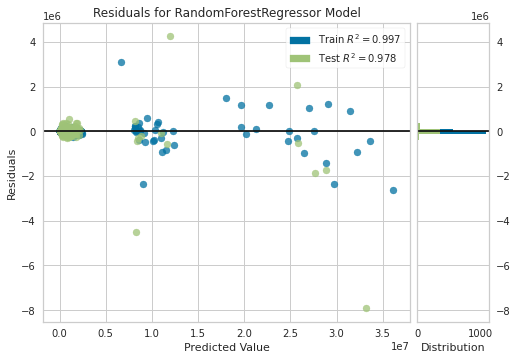

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [21]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import ResidualsPlot
model = make_energy_pipeline(RandomForestRegressor())
visualizer = ResidualsPlot(model)
X_train, X_test, y_train, y_test = tts(*make_sklearn_data(eledf2_2018), test_size=0.2)
visualizer.fit(X_train,y_train)  # Fit the training data to the visualizer
visualizer.score(X_test,y_test)  # Evaluate the model on the test data
visualizer.show()      

In [ ]:
# from sklearn.model_selection import train_test_split as tts
# from sklearn.ensemble import RandomForestRegressor
# from yellowbrick.regressor import ResidualsPlot
# X_train, X_test, y_train, y_test = time_series_evaluate()
# model = make_energy_pipeline(RandomForestRegressor())
# visualizer = ResidualsPlot(model)

# visualizer.fit(X_train,y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test,y_test)  # Evaluate the model on the test data
# visualizer.show()     